In [328]:
#imprt Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [329]:
#import Data
data_train=pd.read_csv('../../data/Car_train-data.csv')

In [330]:
#Data Look
data_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<b> <p style="color:#289e00">Data Clean Part </p> </b>

In [331]:
data_train=data_train.iloc[:,1:]

In [332]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [333]:
#selection of important columns
data_train_c=data_train.iloc[:,[2,3,4,5,7,8,9,10,12]]

In [334]:
#firstly we need to Clean the data for This Dataframe
data_train_c.replace({' ':np.nan,'null':np.nan},inplace=True)
data_train_c=data_train_c.dropna()

<b> <p style="color:red">Warning: Again we need to check Every column in does not exists any  unknown things i.e "null" ,'None','NA' and 'none' etc. Because dropna Can't remove string null like 'null'. if you are not remove this thing then  error will be occur ahead in  data maniplution </p> </b>

In [335]:
# How To check Above Instruction
for i in data_train_c.columns:
     print(data_train_c[i].unique()) #unique value for each column

[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]
[72000 41000 46000 ... 45004 70602 27365]
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl' '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl'
 '12.4 kmpl' '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl'
 '11.74 kmpl' '22.07 kmpl' '19.7 kmpl' '25.4 kmpl' '25.32 kmpl'
 '14.62 kmpl' '14.28 kmpl' '14.9 kmpl' '11.25 kmpl' '24.4 kmpl'
 '16.55 kmpl' '17.11 kmpl' '22.9 kmpl' '17.8 kmpl' '18.9 kmpl'
 '15.04 kmpl' '25.17 kmpl' '20.36 kmpl' '13.29 kmpl' '13.68 kmpl'
 '20.0 kmpl' '15.8 kmpl' '25.0 kmpl' '16.4 kmpl' '24.52 kmpl' '22.1 kmpl'
 '

In [336]:
# Here you can see 'null bhp' occur so it's replace by np.nan and then drop this raw
data_train_c.replace({'null bhp':np.nan,'null km/kg':np.nan,'null CC':np.nan},inplace=True)
data_train_c=data_train_c.dropna()

<b> <p style="color:#289e00">Data Maniplution Part </p> </b>

In [337]:
#remove extenation  km/kg ,bhp, CC from below column and convert string into float Value
l1=['Mileage','Engine','Power']
for i in l1:
    data_train_c[i]=data_train_c[i].str.split(" ").apply(lambda x:x[0])
    data_train_c[i] = data_train_c[i].str.strip()
    data_train_c[i] = data_train_c[i].astype(float)


In [338]:
#Data Look 
data_train_c.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,5.0,17.74


In [339]:
data_train_c.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [340]:
#Fule_Type column is Categorical data so we need to convert into numeric order for Better Price prediction 
data_train_c.Fuel_Type.replace({'Petrol':1,'CNG':3,'Diesel':2,'LPG':4},inplace=True)

In [341]:
data_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   int64  
 3   Transmission       5872 non-null   object 
 4   Mileage            5872 non-null   float64
 5   Engine             5872 non-null   float64
 6   Power              5872 non-null   float64
 7   Seats              5872 non-null   float64
 8   Price              5872 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 458.8+ KB


In [342]:
data_train_c.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [343]:
# Above thing apply in Transmission column
data_train_c.Transmission.replace({'Manual':1,'Automatic':2},inplace=True)

In [344]:
data_train_c.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price
0,2010,72000,3,1,26.60,998.0,58.16,5.0,1.75
1,2015,41000,2,1,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,1,1,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,2,1,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,2,2,15.20,1968.0,140.80,5.0,17.74


In [345]:
data_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   int64  
 3   Transmission       5872 non-null   int64  
 4   Mileage            5872 non-null   float64
 5   Engine             5872 non-null   float64
 6   Power              5872 non-null   float64
 7   Seats              5872 non-null   float64
 8   Price              5872 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 458.8 KB


In [ ]:
'''Before we apply first step  look our  data range  menas  we need to check range  of column  values 
so we will be visualize easily our plot with Price column value'''
for i in data_train_c.columns:
    print(i)
    print(data_train_c[i].describe())

In [347]:
''' Here 'Kilometers_Driven' in High value data so we need to convert high value to lower value
therfore we easily compare with  price value '''
data_train_c['KM_Drlog_form'] = np.log(data_train_c['Kilometers_Driven'])



<i><big> <p style="color:#9e009e"> Linear Regression</big> </i> </p>
<br>
<b> Our Target Variable is Price </b>

<b> step1: we need to find relationship between Independent variable(IV) vs Dependent variable(DI) </b>

In [348]:
%matplotlib inline

<b> Now we will see our relationship between IV and DI </b>

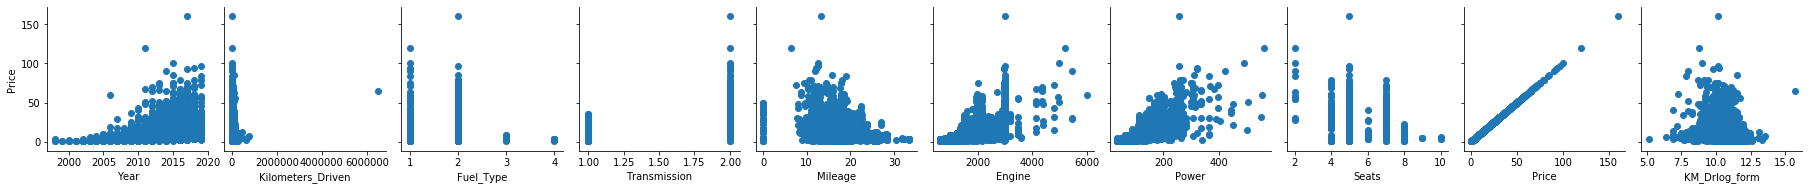

In [349]:
#Scatter plot
g = sns.PairGrid(data_train_c,

                 x_vars=data_train_c.columns,

                 y_vars=['Price'])
g = g.map(plt.scatter)

In [350]:
#remove one outlier  because this outlier distract our model we can see this thing our above sctter plot
b=data_train_c['Kilometers_Driven'].max()
data_train_c['Kilometers_Driven']=data_train_c[data_train_c['Kilometers_Driven']!=b] 
data_train_c['KM_Drlog_form'] = np.log(data_train_c['Kilometers_Driven'])
data_train_c.dropna()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Price,KM_Drlog_form
0,2010,2010.0,3,1,26.60,998.0,58.16,5.0,1.75,7.605890
1,2015,2015.0,2,1,19.67,1582.0,126.20,5.0,12.50,7.608374
2,2011,2011.0,1,1,18.20,1199.0,88.70,5.0,4.50,7.606387
3,2012,2012.0,2,1,20.77,1248.0,88.76,7.0,6.00,7.606885
4,2013,2013.0,2,2,15.20,1968.0,140.80,5.0,17.74,7.607381
...,...,...,...,...,...,...,...,...,...,...
6014,2014,2014.0,2,1,28.40,1248.0,74.00,5.0,4.75,7.607878
6015,2015,2015.0,2,1,24.40,1120.0,71.00,5.0,4.00,7.608374
6016,2012,2012.0,2,1,14.00,2498.0,112.00,8.0,2.90,7.606885
6017,2013,2013.0,1,1,18.90,998.0,67.10,5.0,2.65,7.607381


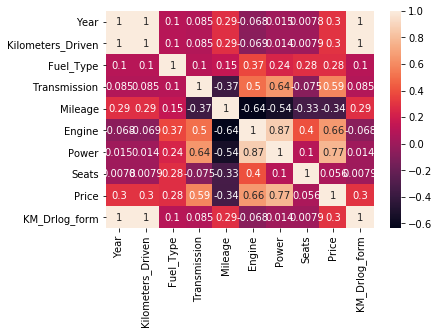

In [351]:
#Heatmap relationship all columns
sns.heatmap(data=data_train_c.corr(), annot = True)

In [353]:
data_train_c.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage',
       'Engine', 'Power', 'Seats', 'Price', 'KM_Drlog_form'],
      dtype='object')

In [355]:
#Fitting Model and Generate results
model=sm.OLS.from_formula('Price~Power+Engine+C(Transmission)+Mileage+C(Fuel_Type)+KM_Drlog_form+Year+C(Seats)',data=data_train_c)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     929.0
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:08:31   Log-Likelihood:                -18818.
No. Observations:                5871   AIC:                         3.767e+04
Df Residuals:                    5854   BIC:                         3.778e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              4.27e+06 

In [356]:
#It's opetional you can use next _cell method 
df = pd.DataFrame() 

for i in ['Power','Engine','Transmission','Mileage','Mileage','Fuel_Type','KM_Drlog_form','Year','Seats']:
    df[i]=data_train_c[i]
df['Pre_Price']=res.predict(df) #price have not negative value so we need convert 
df['Orignal_Price']=data_train_c['Price']

In [321]:
Pre_Price=res.predict()

In [322]:
df

,Power,Engine,Transmission,Mileage,Fuel_Type,KM_Drlog_form,Year,Seats,Pre_Price,Orignal_Price
0,58.16,998.0,1,26.60,3,7.605890,2010,5.0,-2.530537,1.75
1,126.20,1582.0,1,19.67,2,7.608374,2015,5.0,13.053856,12.50
2,88.70,1199.0,1,18.20,1,7.606387,2011,5.0,0.758904,4.50
3,88.76,1248.0,1,20.77,2,7.606885,2012,7.0,2.792938,6.00
4,140.80,1968.0,2,15.20,2,7.607381,2013,5.0,15.652951,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,74.00,1248.0,1,28.40,2,7.607878,2014,5.0,3.023706,4.75
6015,71.00,1120.0,1,24.40,2,7.608374,2015,5.0,5.024993,4.00
6016,112.00,2498.0,1,14.00,2,7.606885,2012,8.0,7.427286,2.90
6017,67.10,998.0,1,18.90,1,7.607381,2013,5.0,-0.072465,2.65


In [378]:
df.groupby('Pre_Price')['Pre_Price'].apply(lambda x: x<0).sum()

634

In [327]:
# if we want relation again pre_price vs all independent variable 
sns.heatmap(data=df.corr(), annot = True)

<b> Now we want to visualize our model Price and Orginal Price </b>

In [325]:
prstd, iv_l, iv_u = wls_prediction_std(res)

In [326]:
n=len(df)

In [289]:
#Common Variable for Comapare our Orginal Price vs Predicted Price 
Time= np.linspace(0, 1000, 100)

Text(0, 0.5, 'Predict vs Orginal(Price)')

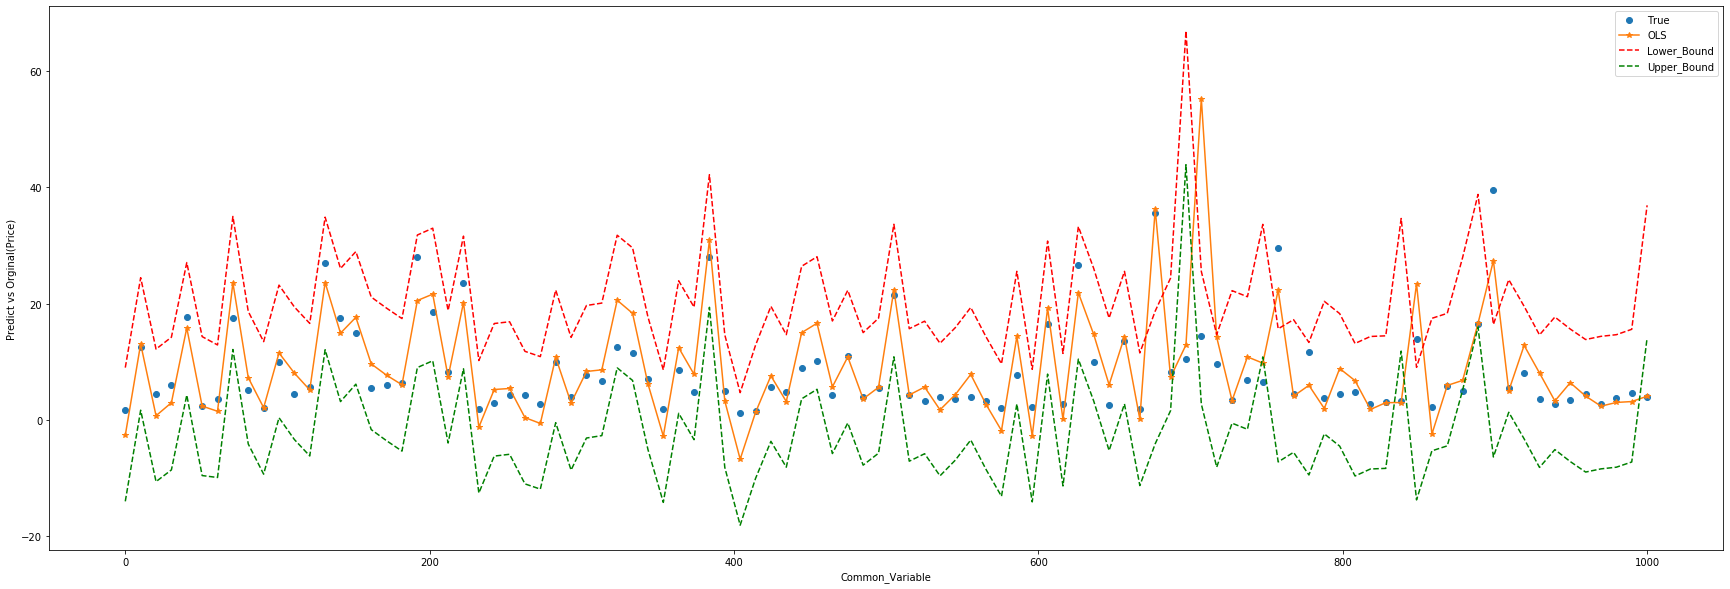

In [380]:
# Here We Can see Variation Upper bound and Lower Bound line
fig, ax = plt.subplots(figsize=(30,10 ))
ax.plot(Time, df['Orignal_Price'][:100], 'o', label="True")
ax.plot(Time, df['Pre_Price'][:100], '*-', label="OLS")
ax.plot(Time, iv_u[:100], 'r--',label='Lower_Bound')
ax.plot(Time, iv_l[:100], 'g--',label='Upper_Bound')
ax.legend(loc='best')
plt.xlabel('Common_Variable')
plt.ylabel('Predict vs Orginal(Price)')

In [ ]:
from statsmodels.sandbox.predict_functional import predict_functional


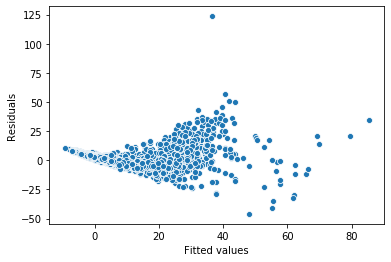

In [389]:
pp = sns.scatterplot(res.fittedvalues, res.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

In [390]:
(res.fittedvalues, res.resid)

(0       -2.663214
 1       13.053145
 2        0.695963
 3        2.937170
 4       15.807785
           ...    
 6014     2.960765
 6015     5.003708
 6016     7.390353
 6017    -0.147434
 6018    -1.567508
 Length: 5871, dtype: float64,
 0       4.413214
 1      -0.553145
 2       3.804037
 3       3.062830
 4       1.932215
           ...   
 6014    1.789235
 6015   -1.003708
 6016   -4.490353
 6017    2.797434
 6018    4.067508
 Length: 5871, dtype: float64)